In [1]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [4]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

## Bagging (Bootstrap aggregating)
- bagging uses training set which is made by ramdom sapling allowing redundancy and teach classifier differently.
- making Bootstrap sample is the same way as random forest
- if the classifier offers predict_proba() method, it predicts with average of probability, otherwise, the results of predict becomes the most frequent class label.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                           oob_score=True, n_jobs=-1, random_state=42)
# oob : out of bag
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [9]:
print("training set accuracy: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("test set accuracy: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("accuracy of OOB sample: {:.3f}".format(bagging.oob_score_))

training set accuracy: 0.955
test set accuracy: 0.951
accuracy of OOB sample: 0.944


In [10]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                           n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

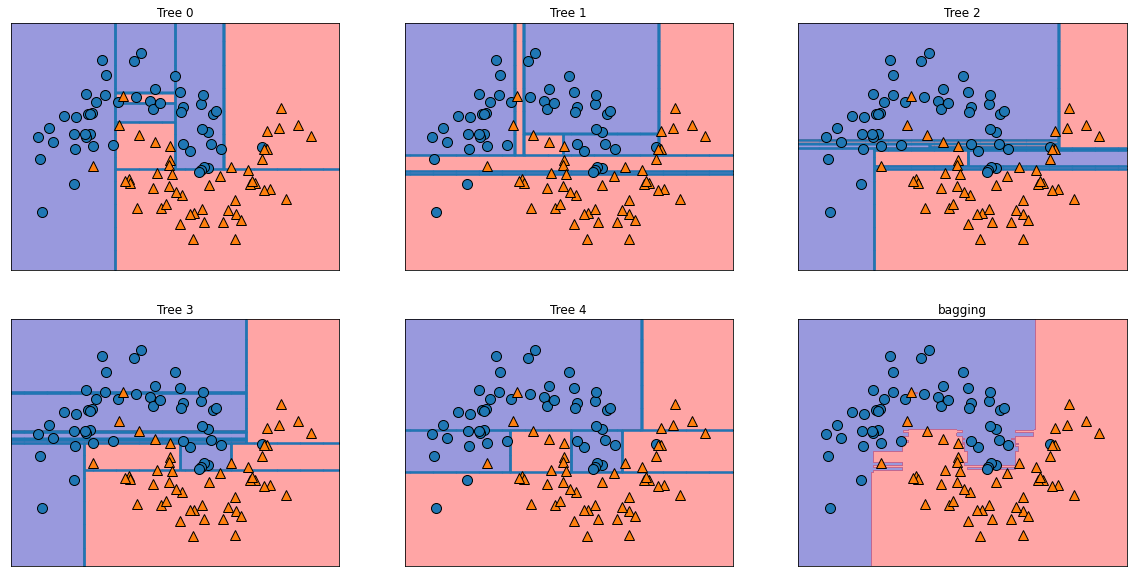

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [14]:
# n_estimators=100
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                           oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)
print("training set accuracy: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("test set accuracy: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("Accuracy of OOB sample: {:.3f}".format(bagging.oob_score_))

training set accuracy: 1.000
test set accuracy: 0.965
Accuracy of OOB sample: 0.948


## Extra Trees
- it is quite similar to random forest but it separate representative features randomly and find the best separation
- Unlike to random forest, this ensemble uses DecisionTreeClassifier(splitter='random') and doesn't apply bootstrap sampling.
- As increasing randomness, generally bias is increased, but dispersion lessen.
- Extra Trees model and Random forest model put randomness differently.
- But the ways of prediction is same as the average of probability made from each tree.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

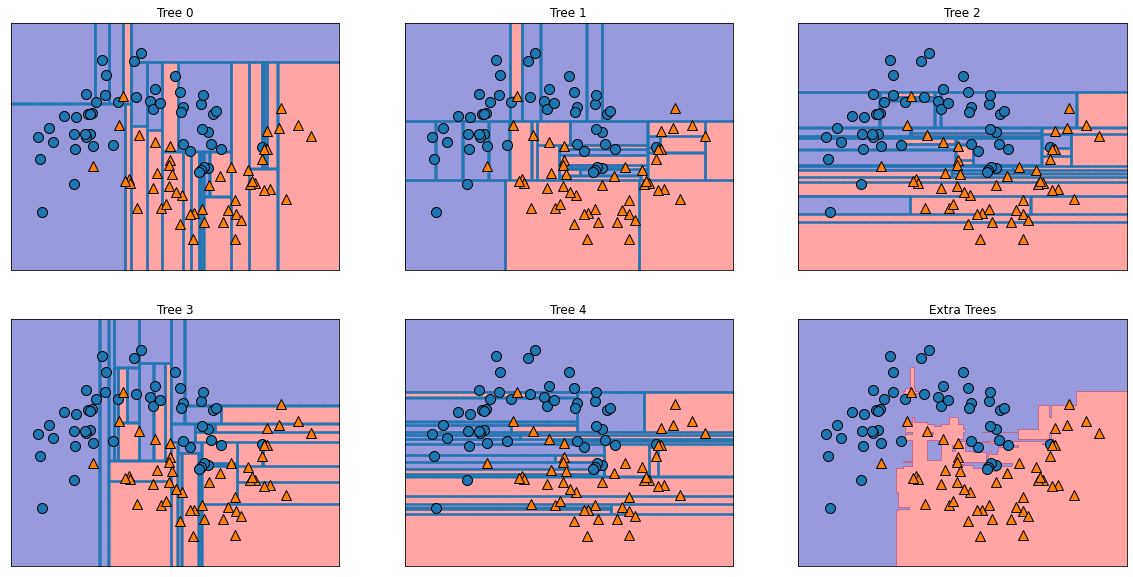

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Extra Trees")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [18]:
# n_estimators=100
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(n_jobs=-1, random_state=0)

In [19]:
print("training set accuracy: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("test set accuracy: {:.3f}".format(xtree.score(Xc_test, yc_test)))

training set accuracy: 1.000
test set accuracy: 0.972


- Extra trees model and random forest model have very similar performance.
- Extra trees model has less calcualte cost than random forest but because of random separation, it has to make lots of trees for normalizing performance.
- Genarally, random forest is more prefered.

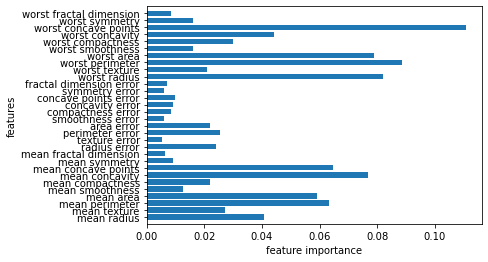

In [22]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importance")
plt.ylabel("features")
plt.ylim(-1, n_features)
plt.show()

## Ada boost (Adaptive Boosting)
- Ada boost uses weak learner as Gradient boosting does.
- But unlike to Gradient boosting, Ada boost train the next model with hightened weight value from samples mis-classified by previous model - Each trained model get weight by performance.
- For prediction, with the label predicted by a model, it sums up the weight of models and chooses the label having the highest weigh value.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

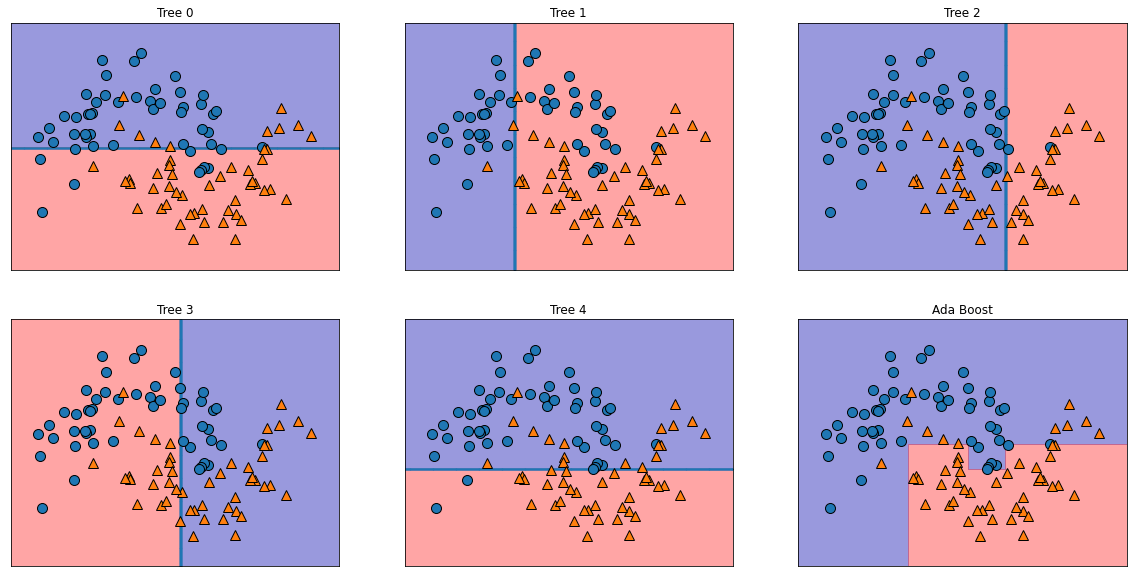

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Ada Boost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

- AdaBoostClassifier uses 1 depth decision tree, so each tree's decision boundary is one line.

In [26]:
# apply to cancer dataset
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("training set accuracy: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("test set accuracy: {:.3f}".format(ada.score(Xc_test, yc_test)))

training set accuracy: 1.000
test set accuracy: 0.986


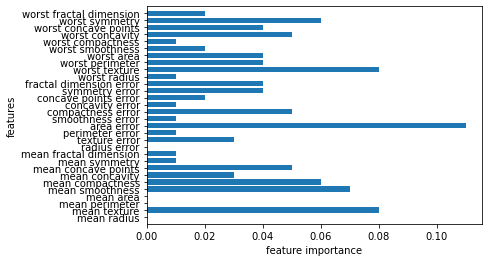

In [28]:
# feature importance
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("feature importance")
plt.ylabel("features")
plt.ylim(-1, n_features)
plt.show()